## <center> Fashion MNIST

In [ ]:
import tensorflow as tf
from tensorflow import keras


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataset = keras.datasets.fashion_mnist

(train_images,train_labels),(test_images,test_labels) = dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

The train_images and train_labels arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the test_images, and test_labels arrays.
The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

Label	Class

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_labels.shape

(10000,)

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
len(train_images) , len(test_images) , len(test_labels) ,len(train_labels)

(60000, 10000, 10000, 60000)

## Preprocess the data

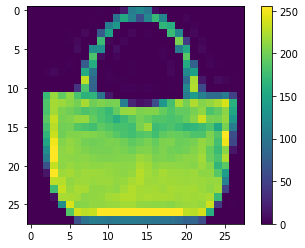

In [ ]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

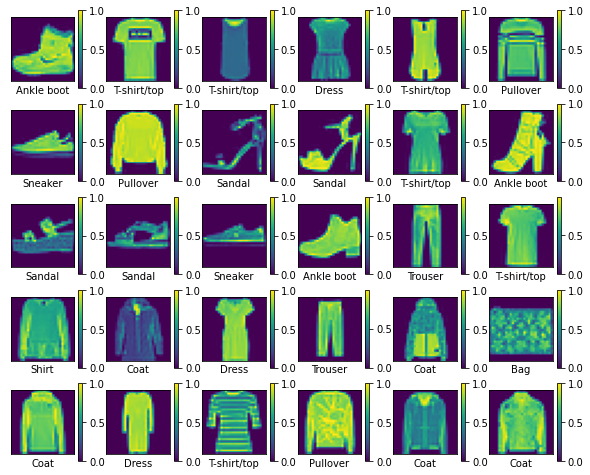

In [ ]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
#     plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.imshow(train_images[i])
    plt.colorbar()
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

In [ ]:
#using keras we are now building model

model = keras.Sequential([
    keras.layers.Flatten(input_shape =(28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [ ]:
model.fit(train_images,train_labels,epochs=20,use_multiprocessing=True) ## working with GPU multiproccessing

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4846 - accuracy: 0.8263
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3603 - accuracy: 0.8675
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3262 - accuracy: 0.8790
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3032 - accuracy: 0.8870
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2847 - accuracy: 0.8946
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2711 - accuracy: 0.8985
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2602 - accuracy: 0.9023
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2491 - accuracy: 0.9068
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2372 - accuracy: 0.9103
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.229

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3530 - accuracy: 0.8894

Test accuracy: 0.8894000053405762


In [ ]:
model.save("fashion_mnist.h5")

## Make Prediction

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])    

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
predictions[0]

array([4.2520129e-10, 6.7938606e-12, 5.2550781e-12, 2.5515931e-12,
       1.0173298e-12, 2.2714686e-07, 1.6496719e-11, 4.6283792e-04,
       2.6759255e-11, 9.9953699e-01], dtype=float32)

In [ ]:
for i in range(20):
    print("Actual label for image ",i ," : ",test_labels[i],end=" and ")
    print("Predicted label for image ",i,": ",np.argmax(predictions[i]))

Actual label for image  0  :  9 and Predicted label for image  0 :  9
Actual label for image  1  :  2 and Predicted label for image  1 :  2
Actual label for image  2  :  1 and Predicted label for image  2 :  1
Actual label for image  3  :  1 and Predicted label for image  3 :  1
Actual label for image  4  :  6 and Predicted label for image  4 :  6
Actual label for image  5  :  1 and Predicted label for image  5 :  1
Actual label for image  6  :  4 and Predicted label for image  6 :  4
Actual label for image  7  :  6 and Predicted label for image  7 :  6
Actual label for image  8  :  5 and Predicted label for image  8 :  5
Actual label for image  9  :  7 and Predicted label for image  9 :  7
Actual label for image  10  :  4 and Predicted label for image  10 :  4
Actual label for image  11  :  5 and Predicted label for image  11 :  5
Actual label for image  12  :  7 and Predicted label for image  12 :  5
Actual label for image  13  :  3 and Predicted label for image  13 :  3
Actual label

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

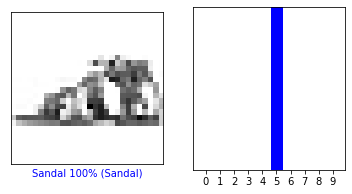

In [ ]:
i = 11
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

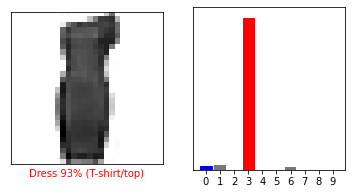

In [ ]:
i = 1111
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

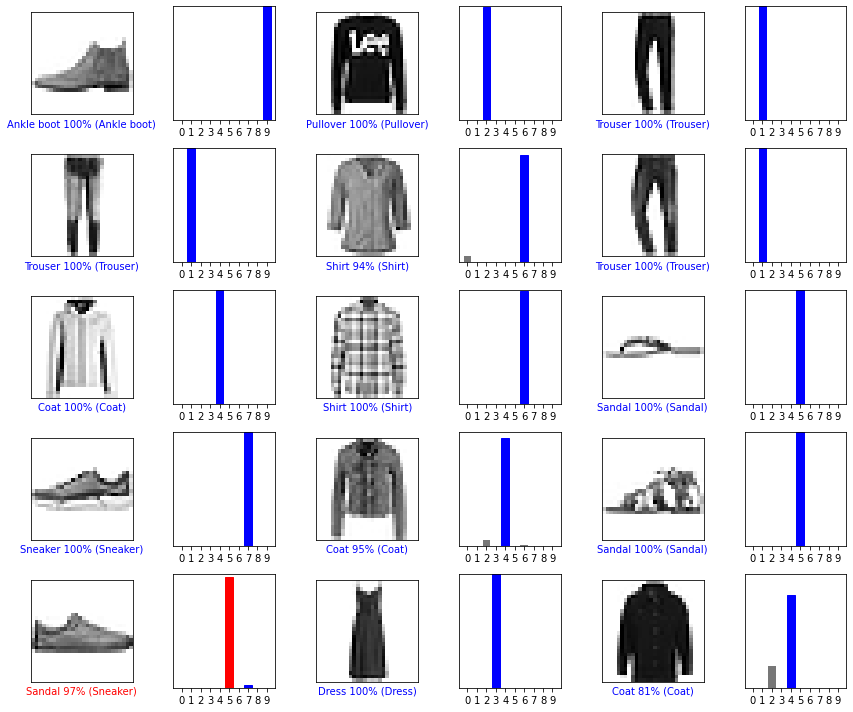

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Testing on trained model

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.2907587e-05 1.6911670e-17 9.9825686e-01 7.1823249e-11 1.6769726e-03
  1.6964606e-15 4.3341643e-05 6.0979265e-13 1.2079551e-08 2.6518824e-19]]


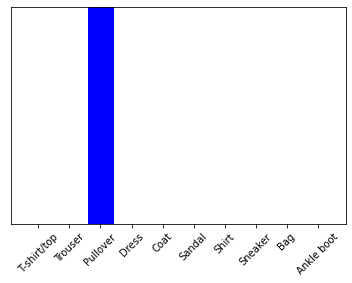

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)